# Non-linear equations

**Prof:**

Francesco Ballarin: francesco.ballarin@sissa.it

## Exercises

### Bisection

**Interpolation** by using the **bisection** method, considering:

$$
f : I \subset C \rightarrow \mathbb{R}
$$

Where find $\alpha \in I$ s.t $f(\alpha) = 0$

Suppose we take an initial interval $I=[a,b]$, the first condition to fulfil is: $f(a)\cdot f(b) \leq 0$.

The function to approximate must cross the $x$-axis.

The interval is splitted into two halves. If one of the halves fulfil $f(a)\cdot f(b) \leq 0$, the other one is discarded. This process is repeated until fulfiling the stop condition, which $\epsilon > b_i - a_i$ or $\epsilon > f(x_i)$

**Code:**

In [14]:
def bisect(f,a,b,eps,n_max):
    a_new = a
    b_new = b
    x = mean([a,b])
    err = eps + 1.
    errors = [err]
    it = 0
    while (err > eps and it < n_max):
        if ( f(a_new) * f(x) < 0 ):
            # root in (a_new,x)
            b_new = x
        else:
            # root in (x,b_new)
            a_new = x
        
        x_new = mean([a_new,b_new])
        
        #err = 0.5 *(b_new -a_new) # Criterion B
        #err = abs(f(x_new)) # Criterion A
        err = abs(x-x_new) # Criterion C
        
        errors.append(err)
        x = x_new
        it += 1
    
    semilogy(errors)
    print(it)
    print(x)
    print(err)
    return errors

## Newton method

$$
x^{k+1} = x^k - \frac{f(x^k)}{f^{\prime}(x^k)}
$$


In [18]:
def newton(f,f_prime,x0,eps,n_max):
    # Initial approximation
    x = x0
    it = 0
    # First iter error
    err = abs(f(x))
    errors = [err]
    while (err > eps and it < n_max):
        x_new = x - (f(x) / f_prime(x))
        err = abs(f(x_new))
        errors.append(err)
        x = x_new
        it += 1
        
    # Some flowers
    semilogy(errors)
    print("X: ", x)
    print("IT: ", it)
    print("ERR: ", err)
    return errors

## Fixed point

$$
f(x)=0 \to x-\phi(x)=0
$$

$$
x^{k+1} = \phi(x^k)
$$

In [31]:
def fixed_point(phi,x0,eps,n_max):
    x = x0
    err = abs(x - phi(x))
    errors = [err]
    it = 0
    
    while (err > eps and it < n_max):
        x_new = phi(x)
        err = abs(x_new - x)
        x = x_new
        errors.append(err)
        it += 1
    
    # Some flowers
    semilogy(errors)
    print("X: ", x)
    print("IT: ", it)
    print("ERR: ", err)
    return errors


## Chord method

$$
q^k \equiv q = \frac{f(b)-f(a)}{b-a}
$$

$$
x^{k+1} = x^k - \frac{f(x^k)}{q}
$$

In [40]:
def chord(f,a,b,x0,eps,n_max):
    q = (f(b)-f(a))/(b-a)
    err = abs(f(x0))
    it = 0
    x = x0
    errors = [err]
    while (err > eps and it < n_max):
        x_new = x - (f(x))/q
        err = abs(f(x_new))
        errors.append(err)
        x = x_new
        it += 1
    # Some flowers
    semilogy(errors)
    print("X: ", x)
    print("IT: ", it)
    print("ERR: ", err)
    return errors

### Secant method

$$
q^k = \frac{f(x^k)-f(x^{k-1})}{x^k - x^{k-1}}
$$

$$
x^{k+1} = x^k - \frac{f(x^k)}{q^k}
$$

Note that this algorithm requires **two** initial points

In [43]:
def secant(f,x0,x00,eps,n_max):
    err = abs(f(x0))
    errors = [err]
    it = 0
    x = x0
    x_1 = x00
    while (err > eps and it < n_max):
        q = (f(x) - f(x_1))/(x - x_1)
        x_new = x - f(x)/q
        err = abs(f(x_new))
        errors.append(err)
        it += 1
        x = x_new
    # Some flowers
    semilogy(errors)
    print("X: ", x)
    print("IT: ", it)
    print("ERR: ", err)
    return errors

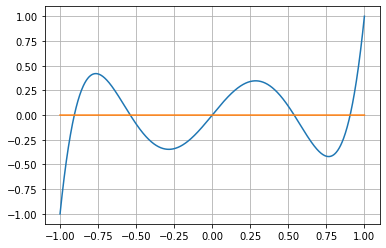

In [36]:
# --- Test ---

%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
import sympy as sym

t = sym.symbols('t')

f_sym = t/8. * (63.*t**4 - 70.*t**2. +15.) # Legendre polynomial of order 5

f_prime_sym = sym.diff(f_sym,t)

f = sym.lambdify(t, f_sym, 'numpy')
f_prime = sym.lambdify(t,f_prime_sym, 'numpy')

phi = lambda x : 63./70.*x**3 + 15./(70.*x)
#phi = lambda x : 70.0/15.0*x**3 - 63.0/15.0*x**5
#phi = lambda x : sqrt((63.*x**4 + 15.0)/70.)

# Let's plot
n = 1025

x = linspace(-1,1,n)
c = zeros_like(x)

_ = plot(x,f(x))
_ = plot(x,c)
_ = grid()

# Initial data for the variuos algorithms

# interval in which we seek the solution 
a = 0.7
b = 1.

# initial points
x0 = (a+b)/2.0
x00 = b

# stopping criteria
eps = 1e-10
n_max = 1000

In [10]:
# Bisection - Criterion A

32
0.9061798459501006
7.857261621871514e-11


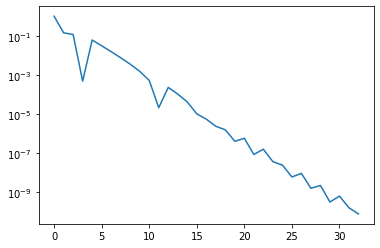

In [9]:
errors_bisect = bisect(f,a,b,eps,n_max)

In [12]:
# Bisection - Criterion B

31
0.906179845915176
6.984918199393064e-11


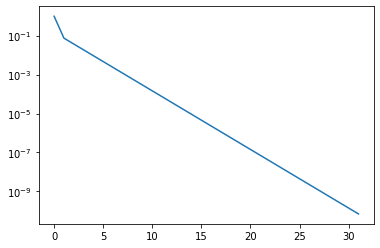

In [13]:
errors_bisect = bisect(f,a,b,eps,n_max)

In [15]:
# Bisection - Criterion C

31
0.906179845915176
6.984912648277941e-11


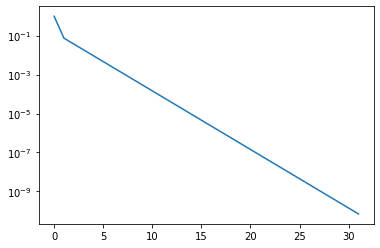

In [16]:
errors_bisect = bisect(f,a,b,eps,n_max)

In [19]:
# Newton Method

X:  0.9061798459386647
IT:  5
ERR:  5.633945684709343e-15
CPU times: user 44.4 ms, sys: 0 ns, total: 44.4 ms
Wall time: 43.2 ms


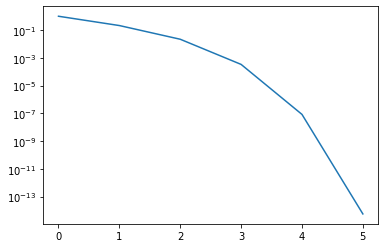

In [20]:
%time errors_newton = newton(f,f_prime,1.0,eps,n_max)

X:  0.5384693101084483
IT:  11
ERR:  6.03431749013339e-11


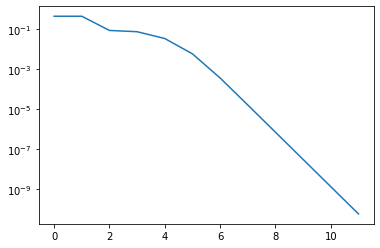

In [34]:
# Fixed point
errors_fixed = fixed_point(phi,0.3,eps,n_max)

X:  0.9061798459502479
IT:  31
ERR:  7.958511674322147e-11


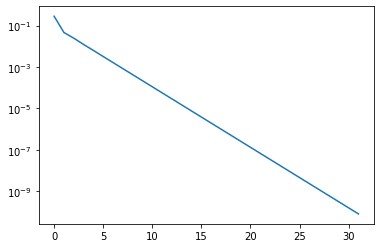

In [41]:
# Chord method
errors_chord = chord (f,a,b,x0,eps,n_max)

X:  0.9061798459295126
IT:  22
ERR:  6.287402899133773e-11


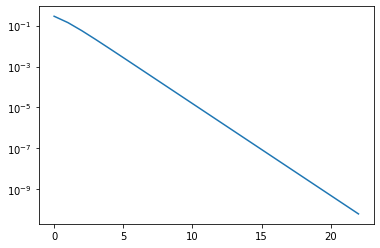

In [44]:
# Secand method
errors_secant = secant(f,x0,x00,eps,n_max)

## Results

### Bisection

**Criterion A**

```
IT: 32
X: 0.9061798459501006
ERR: 7.857261621871514e-11
```

**Criterion B**

```
IT: 31
X: 0.906179845915176
ERR: 6.984918199393064e-11
```

**Criterion C**

```
IT: 31
X: 0.906179845915176
ERR: 6.984912648277941e-11
```

### Newton 

```
X:  0.9061798459386647
IT:  5
ERR:  5.633945684709343e-15
```

### Fixed point

```
X:  0.5384693101084483
IT:  11
ERR:  6.03431749013339e-11
```

### Chord Method

```
X:  0.9061798459502479
IT:  31
ERR:  7.958511674322147e-11
```

### Secand Method

```
X:  0.9061798459295126
IT:  22
ERR:  6.287402899133773e-11
```

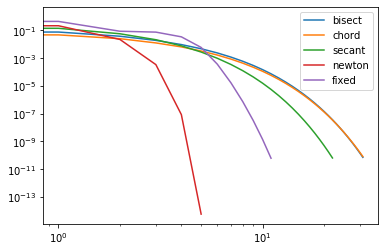

In [46]:
# plot the error convergence for the methods
loglog(errors_bisect, label='bisect')
loglog(errors_chord, label='chord')
loglog(errors_secant, label='secant')
loglog(errors_newton, label ='newton')
loglog(errors_fixed, label ='fixed')
_ = legend()